# Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
pretrain = pd.read_csv("/kaggle/input/news-summary-scoring/pretrained_score.csv")
pretrain.head(3)

,Content,Summary,Pretrain_summary,rouge1,rouge2,rougeL,rougeLsum,bertScore
0,Huỳnh Như (9) và Tuyết Dung (7) là cả kho tàng...,Ở sân chơi đẳng cấp nhất thế giới như World Cu...,Huỳnh Như và Tuyết Dung là cả kho tàng kinh ng...,0.454902,0.268775,0.266667,0.266667,0.750646
1,Chiến công mới của các anh công an thật tuyệt ...,Việc công an nhanh chóng bắt được 2 nghi phạm ...,"Trong ngày 27/5, các lực lượng công an đã thực...",0.385965,0.158824,0.245614,0.245614,0.686364
2,"""Tôi rất vui và phấn khởi, cũng có đôi chút hồ...","Ngay ở lần tham dự Á vận hội đầu tiên, đội tu...","Trần Nguyên Hưng, VĐV đội tuyển Liên Minh Huyề...",0.506494,0.092105,0.285714,0.285714,0.690039


In [3]:
finetune = pd.read_csv("/kaggle/input/news-summary-scoring/finetuned_score.csv")
finetune.head(3)

,Content,Summary,Finetuned_summary,rouge1,rouge2,rougeL,rougeLsum,bertScore
0,Huỳnh Như (9) và Tuyết Dung (7) là cả kho tàng...,Ở sân chơi đẳng cấp nhất thế giới như World Cu...,"Tại World Cup 2023, đội tuyển nữ Việt Nam gặp ...",0.600000,0.202899,0.285714,0.285714,0.720319
1,Chiến công mới của các anh công an thật tuyệt ...,Việc công an nhanh chóng bắt được 2 nghi phạm ...,"Trước tình trạng cướp, giết người, nạn nhân ph...",0.473684,0.071429,0.245614,0.245614,0.692962
2,"""Tôi rất vui và phấn khởi, cũng có đôi chút hồ...","Ngay ở lần tham dự Á vận hội đầu tiên, đội tu...",Trong trận chung kết vòng loại World Cup 2024 ...,0.356436,0.121212,0.237624,0.237624,0.701569


# Visualize and Analysis

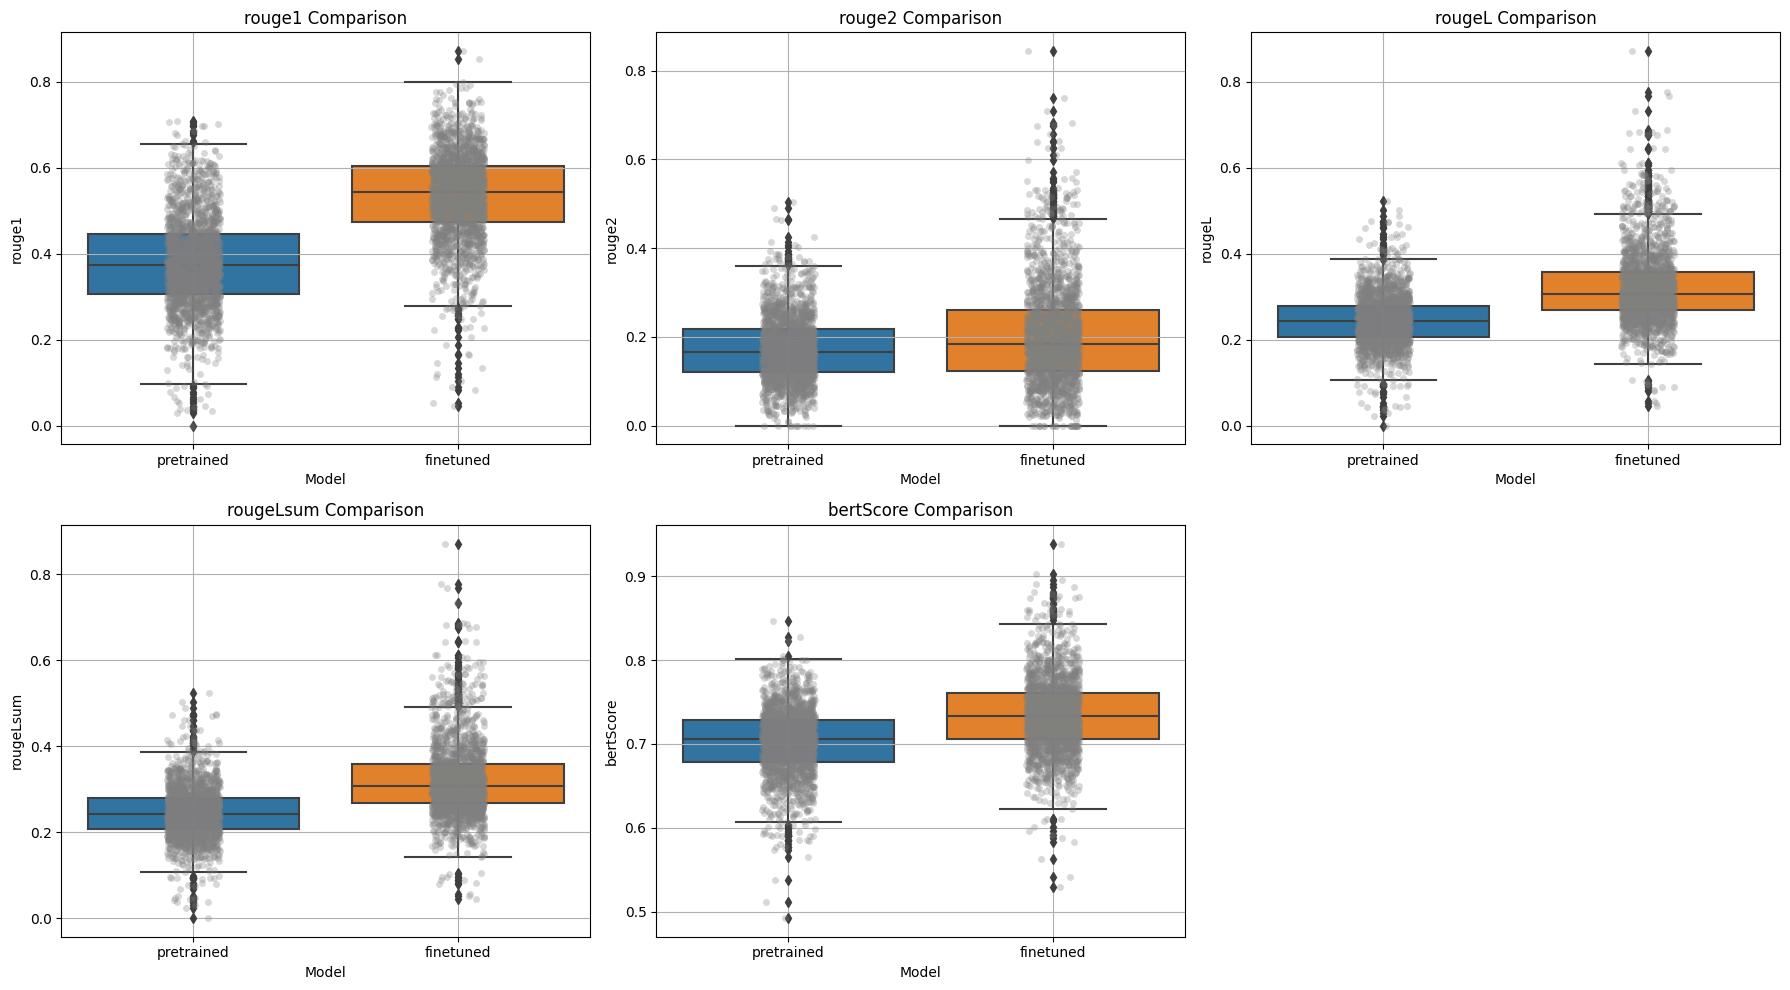

In [4]:
pretrain['model'] = 'pretrained'
finetune['model'] = 'finetuned'

df_all = pd.concat([pretrain, finetune], ignore_index=True)

metrics = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bertScore']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(data=df_all, x='model', y=metric, ax=axes[i])
    sns.stripplot(data=df_all, x='model', y=metric, color='gray', alpha=0.3, ax=axes[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)

for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

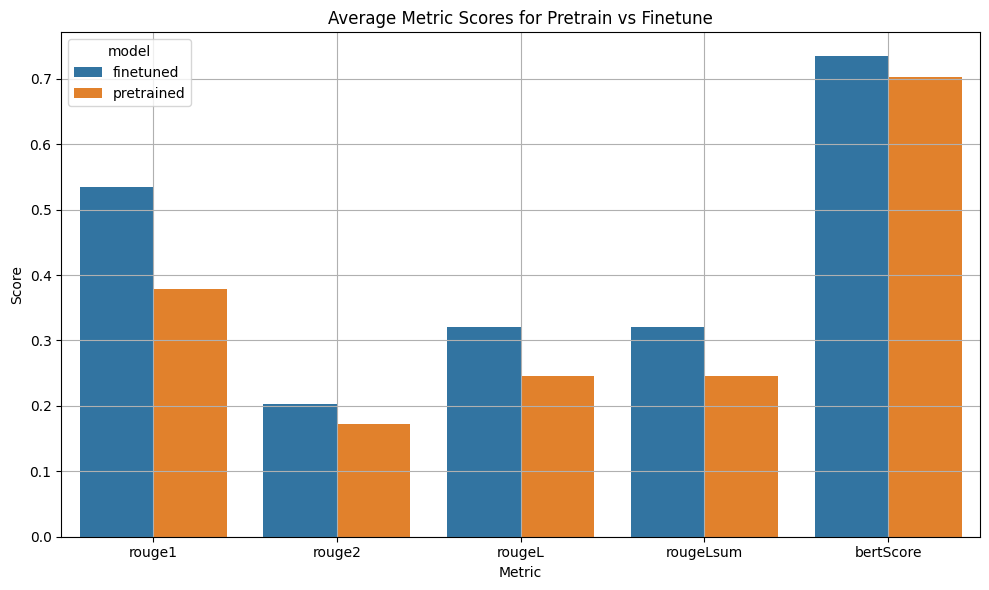

In [5]:
mean_scores = df_all.groupby('model')[metrics].mean().reset_index().melt(id_vars='model')

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_scores, x='variable', y='value', hue='model')
plt.title('Average Metric Scores for Pretrain vs Finetune')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
from scipy.stats import ttest_rel

for metric in metrics:
    stat, p = ttest_rel(finetune[metric], pretrain[metric])
    print(f"{metric} - t-stat={stat:.3f}, p-value={p:.3f}")

rouge1 - t-stat=56.347, p-value=0.000
rouge2 - t-stat=12.732, p-value=0.000
rougeL - t-stat=37.449, p-value=0.000
rougeLsum - t-stat=37.449, p-value=0.000
bertScore - t-stat=30.142, p-value=0.000
